In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()
c

Client Scheduler: tcp://127.0.0.1:45922 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 34.36 GB


In [8]:
## path for mdules

import sys
sys.path.insert(0,"/gpfswork/rech/egi/rote001/git/xscale")
import xscale

sys.path.insert(0,"/gpfswork/rech/egi/rote001/git/diags-CMEMS-on-occigen/common-lib/")
import GriddedData

## imports

import numpy as np
import numpy.ma as ma
import xarray as xr
import time

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy
cartopy.config['pre_existing_data_dir']  = '/gpfswork/rech/egi/rote001/cartopy/cartopy_data' 



import matplotlib.cm as mplcm
import matplotlib.ticker as mticker
seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import matplotlib.pyplot as plt

import glob
import os 

%matplotlib inline

In [3]:
gridfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mesh_hgr.nc4'
coordfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_coordinates_v3.nc4'
maskfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4'

In [4]:
coord=xr.open_dataset(coordfile)
navlat= coord['nav_lat']
navlon= coord['nav_lon']

grid=xr.open_dataset(gridfile)
e1u=grid.e1u
e1v=grid.e1v
e2u=grid.e2u
e2v=grid.e2v
ff=grid.ff

mask=xr.open_dataset(maskfile)
tmask_surf=mask.tmask[0,0]

In [5]:
eNATL60MED_files='/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/*gridT-2D*'
dsMED=xr.open_mfdataset(eNATL60MED_files,concat_dim='time_counter',combine='nested')

In [6]:
dsMED_1month=dsMED.sel(time_counter=slice('2010-02-05','2010-03-'))

CPU times: user 1.21 s, sys: 96.6 ms, total: 1.3 s
Wall time: 10.9 s


Text(0.5, 1.08, 'eNATL60 mean ssh 1 month')

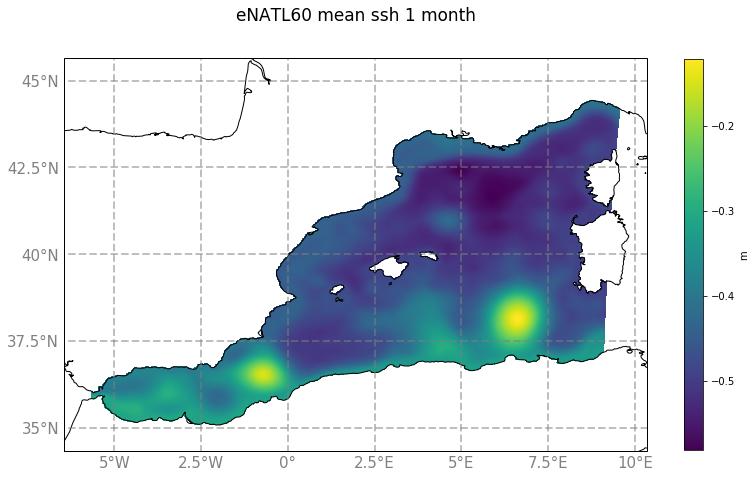

In [22]:
%%time

fig=plt.figure(figsize=(15,18))
pj= ccrs.PlateCarree()
ax=plt.subplot(1,1,1,projection=pj)

ax.coastlines(resolution="10m")
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
gl.xlocator = mticker.FixedLocator([-10,-7.5,-5,-2.5,0,2.5,5,7.5,10,12.5,15])
gl.ylocator = mticker.FixedLocator([30,32.5,35,37.5,40,42.5,45,47.5,50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

ssh=dsMED_1month.sossheig.mean(dim='time_counter')
ssh_mask=ma.masked_where(tmask_surf==0.,ssh)


cs = plt.pcolormesh(navlon,navlat,ssh_mask,transform=ccrs.PlateCarree())
cbar = plt.colorbar(cs,orientation='vertical',shrink=0.4,label='m')
ax.set_title('eNATL60 mean ssh 1 month',size=17,y=1.08)

